### Splitting the data

In [1]:
#Train test splitting
#Numpy array vs pd dataframe

In [2]:
from sklearn.datasets import load_iris

irisData = load_iris()

In [3]:
#split your data for ML
from sklearn.model_selection import train_test_split

#observations (concrete values) as X and target (0,1,2) as y
X, y = irisData["data"], irisData["target"]

#split both X and y equally in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
irisData["data"][:5]
#result: 4 columns (= 4 different features => see cell below)
#data containing: observations (on the feature values) for every flower (represented by []) etc.

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
irisData['target'] #1 dimensional array, class we want to predict, representing our target_names setosa, versicolor, virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
X_train.shape, X.shape, X_test.shape

((120, 4), (150, 4), (30, 4))

In [7]:
X_train[:5] #values of the training set (80% after split)

array([[6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.2]])

### Building a dataframe

In [19]:
import pandas as pd
import numpy as np

#np.c_: makes rows to columns along their 2nd axis (not like transposition)
#without np.c_: ValueError: could not broadcast input array from shape (150,4) into shape (150,)
dfData = pd.DataFrame(np.c_[irisData["data"],irisData["target"]], columns = irisData["feature_names"]+["target"])

#new train_test_split is necessary on the dataframe
X_train, X_test, y_train, y_test = train_test_split(dfData[irisData["feature_names"]], 
                                                    dfData["target"], 
                                                    test_size=0.2, 
                                                    random_state=0)

In [21]:
dfData.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [20]:
print(X_train.head())
print()
print(y_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
137                6.4               3.1                5.5               1.8
84                 5.4               3.0                4.5               1.5
27                 5.2               3.5                1.5               0.2
127                6.1               3.0                4.9               1.8
132                6.4               2.8                5.6               2.2

137    2.0
84     1.0
27     0.0
127    2.0
132    2.0
Name: target, dtype: float64


### Stratified Splitting

In [22]:
#stratified splitting: use when data that is extremely underrepresented
#taking one parameter and keeping the distribution fixed
"""This is important when the original dataset is imbalanced, meaning that there are significantly more examples of one class than another."""
from sklearn.model_selection import StratifiedShuffleSplit

#initiate class
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

#loop through indices
for train_index, test_index in stratSplit.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [24]:
#select train and test set based on the indices (splits)
for train_index, test_index in stratSplit.split(dfData[irisData["feature_names"]], dfData["target"]):
    X_train = dfData[irisData["feature_names"]].iloc[train_index]
    X_test = dfData[irisData["feature_names"]].iloc[test_index]
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [25]:
print(X_train.head())
print(y_train.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
45                4.8               3.0                1.4               0.3
1                 4.9               3.0                1.4               0.2
38                4.4               3.0                1.3               0.2
7                 5.0               3.4                1.5               0.2
82                5.8               2.7                3.9               1.2
45    0.0
1     0.0
38    0.0
7     0.0
82    1.0
Name: target, dtype: float64


In [28]:
numZeros = [] #number of zeroes for the random split
numZerosStrat = [] #zeroes strat split
expectedZeros = 0.2*list(y).count(0) #counting total number of zeroes in our target multiplied by our split (0.2)

#Removing random states
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for i in range(100): #100 trials (iterations)
    
    #random split
    _,_,_,y_test_temp = train_test_split(X, y, test_size=0.2)
    numZeros.append(list(y_test_temp).count(0))
    
    #stratified split
    for train_index, test_index in stratSplit.split(X, y):
        _, y_test_temp_strat = y[train_index], y[test_index]
    numZerosStrat.append(list(y_test_temp_strat).count(0))

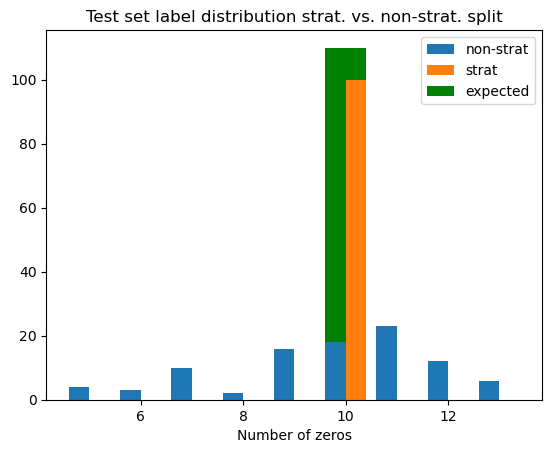

In [29]:
import matplotlib.pyplot as plt

plt.bar(expectedZeros,width=0.8,color="green",height=110,label="expected")
plt.hist([numZeros,numZerosStrat],label=["non-strat","strat"],bins=np.arange(5,15,1),align="left")
plt.xlabel("Number of zeros")
plt.title("Test set label distribution strat. vs. non-strat. split")
plt.legend()
plt.show()
#result: after 100 trials the random split returns a varying number of zeroes while the
#stratified split returns almost the exact amount
#stratified split keeps all of the distributions equal